In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
from IPython.display import HTML
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import patsy
from patsy import dmatrix

sns.set_style('darkgrid')

# Use this in notebook to show plots
%matplotlib inline

import sklearn
from sklearn.datasets import load_boston # No usaremos este, sino el Iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from sklearn.datasets import load_breast_cancer
import seaborn as sns
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix



In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Analisis de Primeros Eventos De League of Legends

Por **Yuri Kaffaty**

Universidad Francisco Marroquin 

# **Abstract**

En este trabajo se analizan los diferentes objetivos que existen en League of Legends (LoL) para poder definir cuales de ellos son mas importantes para asegurar una victoria. Para esto, utilizaremos el dataset de “League of Legends Ranked Games Details from over 50,000 ranked games of LoL”. Haremos diferentes pruebas con algunos de los algoritmos vistos durante el semestre (entre ellos diferentes modelos de regresión, Decision Trees, Redes Neuronales y Boosting) para comprobar que tanto peso tienen los primeros eventos, tales como la primera torre y el primer Baron Nashor, al momento de definir al ganador final en cada partida.


# Introduccion
League of Legends es por mucho uno de los juegos mas populares hoy en dia. Jugadores de todo el mundo pueden pasar el dia entero jugando sin perder el interes gracias a la amplia variedad de campeones, habilidades y objetos que le dan un giro unico a cada partida. Ciertamente, League of Legends esta creciendo exponencialmente dentro de la comunidad de "gamers" del mundo, y en latino america el juego tambien empieza a crecer en el ambito de eSports. 

El juego fue desarollado y lanzado por Riot Games en el 2009. Esta misma compañia se encarga de cualquier update o parche del juego, que es lo que realmente le da esa sensacion de cambio constante pero estable al juego. Cada parche cambian diferentes aspectos del mismo, por lo que en muchos casos los campeones y items varian indefinidamente entre partidas. 


### Como se gana?
Es facil aprender a jugar LoL, pero definitvamente puede tomar meses o años el convertirse un maestro en el mismo. Este juego necesita tanto tener la estrategi necesaria como tener el las habilidades para poder asegurar la victoria. 

Cada partida consiste en dos equipos de 5 jugadores que son comunmente llamados equipo azul y equipo rojo. Cada equipo empieza en lados diferentes de un mapa simetrico llamado "Grieta del Invocador". Usualmente un juego puede tomar entre 30 y 40 minutos dependiendo de los jugadores. 

El proposito principal de este juego es destruir el Nexo enemigo, el cual durante la partida generara oleadas de "subditos" que ayudaran durante la partida. A cada uno de los 5 jugadores se le asigna un rol especifico en el juego entre los siguientes; soporte, carrilero central, carrilero superior, jungla y tirador. Cada rol tine diferentes objetivos y estrategias, pero la idea de tener estos roles es que el team tendra que trabajar como equipo y combinar sus fuerzas y debilidades para recorrer todo el mapa hasta llegar a destruir el nexo enemigo. 

La manera final de conseguir superioridad sobre el enemigo depende de los objetivos generales. Estos objetivos no son faciles de conseguir, por lo que cada objetivo completado usualmente resulta en una recompensa grande para el equipo o jugador. Por ejemplo, si se logra desterrar al Baron Nashor el equipo completo contara con estadisticas mas altas y con oleadas de subditos mas poderosas. Pero en contrapart, toma bastante tiempo alcanzar este objetivo, por lo que hay muchas partidas que se definen alrededor de este. 

Este solo es uno de los diferentes objetivos que pueden haber dentro del juego, asi que para que un equipo consiga todos los objetivos, este debera trabajar como un reloj para no solo conseguir todos los objetivos, sino tambien llegar al otro lado del mapa y destruir el Nexo enemigo. 


### Cuales son los objetivos de este proyecto?
Debido a la profundidad y complejidad del juego, en muchas ocaciones puede ser dificil el determinar que equipo ganara hasta los ultimos minutos del juego, o usualmente esto es lo que se piensa. 

En realidad, jugadores profesionales de League of Legends pueden construir su propia ventaja competitiva en los primeros minutos del juego. Inlcuso antes de que empieze el juego debe de haber una estrategia, ya que en la fase de eleccion de campeones se pueden crear estrategias que guien el juego desde el principio.

Pero la forma más confiable de asegurar una ventaja competitiva desde el comienzo del juego es completar los objetivos antes de que lo haga el equipo enemigo. De hecho, muchos juegos se deciden por decisiones tempranas del juego, lo que significa que en muchos casos se puede predecir el ganador del juego después de solo 10 minutos. Sé que esto puede parecer un poco exagerado, pero hoy demostraré cuánta diferencia e impacto tendrán los "primeros" eventos y objetivos en un juego. 

Estos elementos combinados pueden hacer que sea muy difícil para un humano predecir qué equipo saldrá victorioso, y es por eso que opte por ver si una máquina podría resolverlo.

En resumen, intentare responder las siguientes preguntas: 

- ¿El lado del mapa en el cual cada equipo juega afecta el resultado del juego?
- ¿Se puede predecir un ganador tomando en cuenta solo los "primeros" eventos del juego? 
- Es usable dentro del juego 
- ¿Es esto aplicable a juegos de eSports profesionales?

### Como alcanzare esto?

To find this, I will be using a few of the algorithms we used in class. I will be using a boosting model and a random tree model to predict the winning team based on the first objectives and based on the accuracy of each model I will be answering the questions stated before.




# Data

El dataset que usaremos para este proyecto fue encontrado en Kaggle con el nombre de "(LoL) League of Legends Ranked Games Details from over 50,000 ranked games of LoL". Esta data fue minada del API de Riot Games usando el Cassiopeia Wrap para Python 3. 

Es bastante facil obtener datos del API, pero el tiempo de descarga es bastante alto debido a toda la informacion que hay por partida. El dataset consta de 61 columnas con 51,490 observaciones. La alta cantidad de columnas es debido a que el dataset contiene informacion de los dos equipos. 

Para este proyecto usaremos las siguientes: 

- Game ID: El ID por partida que Riot Games asigna 
- Creation Time : La hora y fecha exacta en la que la partida fue creada. 
- Game Duration (en segundos): La mayoria de juegos no duraran menos de 15 minutos amenos que algun equipo tenga que rehacer la partida debido a un jugador faltante. 
- Season ID: La temporada en la que se jugo la partida
- Winner: 1 = team1, 2 = team2, No pueden existir empates 
- First Baron, dragon, tower, blood, inhibitor and Rift Herald (1 = team1, 2 = team2, 0 = none): Especifica que equipo se quedo con el objetivo
- Ccampeones y hechizos de invovador (Almacenados por el ID que Riot Games asigna): Describe que campeon y que hechizo de invocador se llevo en cada partidapor cada jugador 
- Cuantas torres, inhibidores, Barones, dragones y Heraldos: Especifica cuantos objetivos fueron tomados por cada uno de los equipos.
- Los 5 baneos de cada equipo (Denuevo se usan los ID asignados para cada Campeon): En la fase de seleccion cada equipo puede banear 5 campeones, lo cual impide que dichos campeones sean usados por el otro equipo

In [3]:
df = pd.read_csv('Clean_LeagueOfLegends.csv')
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,blue,red,blue,blue,blue,blue,...,5,neither,neither,blue,blue,Fiora,Vayne,Karma,Soraka,Caitlyn
1,3229566029,1497848803862,1851,9,blue,blue,blue,blue,neither,blue,...,red,neither,neither,neither,neither,Master Yi,Vayne,Zed,Caitlyn,Illaoi
2,3327363504,1504360103310,1493,9,blue,red,blue,blue,blue,red,...,red,neither,neither,blue,neither,Yasuo,Zed,Kha'Zix,Maokai,Evelynn
3,3326856598,1504348503996,1758,9,blue,blue,blue,blue,blue,blue,...,neither,neither,neither,neither,neither,Camille,Tristana,Kayn,Janna,Caitlyn
4,3330080762,1504554410899,2094,9,blue,red,blue,blue,blue,blue,...,3,neither,neither,blue,neither,Garen,Master Yi,Braum,Darius,Tristana


In [4]:


def idToName(ID, dic):
    '''
    ID: champion ID as listed in original dataframe
    dic: champInfo from json, defined above

    used to convert ID's to champion names
    '''
    champ = dic['name'][ID]
    return champ    

def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
  
    for key, value in freq.items(): 
        print ("% s : % d"%(key, value)) 
  

## Prioridades por Equipo (Azul o Rojo)

Intentaremos encontrar al equipo ganador al final del juego en función de los primeros objetivos. Debido a esto, tenía que asegurarme de que las columnas fueran exactamente como las necesitaba, así que hice algunos cambios para que fuera más fácil agregar esta información a los modelos.

In [5]:
dataClean = df.replace([0,1,2],['neither','blue','red'])
dataClean["winner"]= dataClean["winner"].map({'neither':0,'blue':1,'red':2})
dataClean.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,red,blue,blue,blue,blue,...,5,neither,neither,blue,blue,Fiora,Vayne,Karma,Soraka,Caitlyn
1,3229566029,1497848803862,1851,9,1,blue,blue,blue,neither,blue,...,red,neither,neither,neither,neither,Master Yi,Vayne,Zed,Caitlyn,Illaoi
2,3327363504,1504360103310,1493,9,1,red,blue,blue,blue,red,...,red,neither,neither,blue,neither,Yasuo,Zed,Kha'Zix,Maokai,Evelynn
3,3326856598,1504348503996,1758,9,1,blue,blue,blue,blue,blue,...,neither,neither,neither,neither,neither,Camille,Tristana,Kayn,Janna,Caitlyn
4,3330080762,1504554410899,2094,9,1,red,blue,blue,blue,blue,...,3,neither,neither,blue,neither,Garen,Master Yi,Braum,Darius,Tristana


Como se puede ver en la parte de procesamiento de datos de este proyecto, una vez que comenzó el juego, cada equipo buscó el primer resultado que se pudo obtener; la "primera sangre". Como se puede ver en la tabla a continuación, hay 555 juegos en los que no hubo una primera sangre, y esto se debe a que esos juegos seguramente fueron un remake. Hay una rara posibilidad de que un juego realmente se haya llevado a cabo sin una sola muerte, pero para ser honesto, eso solo sucedería si ambos equipos se desafiaran mutuamente para no matarse entre sí o si el juego simplemente fallara y no contara las muertes, Pero ambos escenarios son extremadamente raros.

In [6]:
firsts = ['firstBlood','firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']
firstTotals = dataClean[firsts].apply(pd.value_counts)
newIndex = ['blue','red','neither']
firstSort = firstTotals.reindex(index=newIndex)
firstSort

,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
blue,26113,25861,23054,14758,24690,12948
red,24822,24416,22160,16474,24800,12363
neither,555,1213,6276,20258,2000,26179


# Metodos

In [7]:
data_sub = dataClean[['gameDuration','winner','firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald']]

In [8]:
y = data_sub['winner']
data_sub.drop(axis=1, labels='winner', inplace=True)
import warnings
warnings.filterwarnings('ignore')

D:\Anaonda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
yc = dataClean["t1_towerKills"]

In [10]:
data_category = data_sub.select_dtypes(object).astype('category')
data_category = pd.get_dummies(data_category)
data_numeric = data_sub.select_dtypes(exclude='object')
data_final = data_category.join(data_numeric)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_final, y, test_size=0.30, random_state=100)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(data_final, yc, test_size=0.30, random_state=100)

## Regression Lineal

La regresión lineal es un tipo de análisis predictivo básico y comúnmente utilizado que generalmente funciona en datos continuos. Es genial cuando no hay muchas variables correlacionadas, ya que podrá analizar una sola variable a la vez.

**Ventajas de una regresión lineal**

- fácil de implementar pero potente 
- los resultados se explican fácilmente 

**Desventajas de una regresión lineal**

- no se pueden modelar relaciones más complejas entre los datos
- muy afectados por los valores atípicos: 
- es no muy robusto 

## **¿Cómo funciona una regresión lineal para mi conjunto de datos?** 
Bueno, como puede ver por los resultados de R Squared, una regresión lineal simple definitivamente no es un buen ajuste para lo que estoy buscando. La baja R cuadrada sugiere que mis datos son un poco más complejos, por lo que necesitaría un modelo más robusto, como una regresión polinomial.

In [12]:
X_train = sm.add_constant(X_train)
simple_model = sm.OLS(y_train,X_train[['firstInhibitor_red', 'const']])
simple_result = simple_model.fit()


In [13]:

X_test = sm.add_constant(X_test)
y_pred_simple = simple_result.predict(X_test[['firstInhibitor_red', 'const']])
print(simple_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 winner   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                 4.113e+04
Date:                Thu, 16 May 2019   Prob (F-statistic):               0.00
Time:                        13:51:38   Log-Likelihood:                -12437.
No. Observations:               36043   AIC:                         2.488e+04
Df Residuals:                   36041   BIC:                         2.489e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
firstInhibitor_red     0.7370      0

## Regresion Polinomial 


Cuando dos variables están fuertemente correlacionadas y no tienen una relación lineal, una regresión polinomial puede ser la mejor opción. Sobre todo porque este modelo se adaptará a la flexibilidad y complejidad del conjunto de datos y devolverá un mayor R al cuadrado.

**Ventajas de usar la Regresión Polinomial**
- Polinomio proporciona la mejor aproximación de la relación entre la variable dependiente e independiente. 
- Se puede ajustar una amplia gama de funciones debajo de ella. 
- El polinomio se ajusta básicamente a una amplia gama de curvatura. 

**Desventajas de usar la Regresión Polinomial** 
- La presencia de uno o dos valores atípicos en los datos puede afectar seriamente los resultados del análisis no lineal. 
- Además, desafortunadamente hay menos herramientas de validación de modelos para la detección de valores atípicos en la regresión no lineal que para la regresión lineal. 

### **¿Cómo ayudó la regresión polinomial a mis resultados?**
Bueno, al principio no se puede ver una diferencia significativa entre la regresión lineal y la polinómica. Al menos una regresión de tercer grado mostró una mayor adaptación a los datos, como se puede ver en los gráficos. Sin embargo, no hay una diferencia significativa entre la R cuadrada de las regresiones lineales y polinómicas. Pero fue esta regresión la que demostro la colinealidad entre las variables que estoy tratando de predecir. Debido a esto, tuve que adoptar un enfoque diferente al problema.

In [14]:
poly_reg = PolynomialFeatures(degree = 3)
X_poly_train = poly_reg.fit_transform(pd.DataFrame(X_train['firstInhibitor_red']))
X_poly_test = poly_reg.fit_transform(pd.DataFrame(X_test['firstInhibitor_red']))
poly_result = poly_reg.fit(X_poly_train, y_train)
poly_model = LinearRegression()
poly_result = poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

In [15]:
poly_model = sm.OLS(y_train,X_poly_train)
poly_result = poly_model.fit()
print(poly_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 winner   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                 4.113e+04
Date:                Thu, 16 May 2019   Prob (F-statistic):               0.00
Time:                        13:51:38   Log-Likelihood:                -12437.
No. Observations:               36043   AIC:                         2.488e+04
Df Residuals:                   36041   BIC:                         2.489e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1770      0.002    493.083      0.0

Ridge Regression es teóricamente más valiosa cuando se usa para contrarrestar el efecto de la colinealidad. 
## **Ventajas de la regresión de Ridge**
- la regresión de Ridge se puede utilizar para abordar los problemas que se producirían cuando las variables son colineales 
- La regresión hace un buen trabajo al optimizar dichos modelos porque exagerará las variables correlacionadas: el modelo querrá optimizar para tales variables más, y para las variables independientes que proporcionan información realmente única 

### **¿Cómo ayudó la Ridge Regression a mis resultados?** 
Dado que las variables colineales no son fáciles de manejar por sí mismas ya que ambas básicamente me dan la misma información, ridge regression me ayudará a normalizar los datos para que sea más fácil de manejar. 

Ridge Regression no nos da sparcity, por lo que es una mejor opción en comparación con la regresión de lazo.Teniendo en cuenta la complejidad del conjunto de datos y las variables colineales, es posible que el modelo no sea tan malo para predicciones como pensabamos ya que el accuracy para esta regresion es de aproximadamente 63%

In [16]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr = rr.fit(X_train, y_train)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
print ("Ridge Regression Train Score low alpha:", Ridge_train_score)
print ("Ridge Regression Test Score low alpha:", Ridge_test_score)


Ridge Regression Train Score low alpha: 0.6337280585590108
Ridge Regression Test Score low alpha: 0.6336606834823113


## Boosting 

Como el primer método que usaré para resolver este problema, usaré un método de Boosting ya que tengo una gran cantidad de datos y hay muchos casos en los que un modelo de Boosting se beneficiará de la gran cantidad de datos. 

El término "boosting" se refiere a una familia de algoritmos que convierte al aprendiz débil en aprendices fuertes. El boosting es un método conjunto para mejorar las predicciones del modelo de cualquier algoritmo de aprendizaje dado. 

La idea de el boosting es entrenar a los conjuntos débiles de forma secuencial, cada uno tratando de corregir a su predecesor.

Aún así, hay algunos inconvenientes que vienen con este método, pero aún así no afectaron tanto a mi modelo, por lo que todavía podría usarlo.

Algunos de estos inconvenientes son: 

- Es mas dificil calibrar comparado con otros modelos ya que hay tantos hiperparametros que operar que puede haber mas probabilidadde un overfit

- No es tan facil interpretarlo comparado con clasificadores lineares y regressiones. 

- Toma bastante tiempo en entrenar y calificar

En este caso se crear diferentes dummies para diferentes variables para que fuera un poco menos complicado poder crear los modelos. Ademas muchos de los valores estaban como texto de "red" o "blue". 

In [17]:
data_sub = dataClean[['gameDuration','winner','firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald']]


In [18]:
y = data_sub['winner']
data_sub.drop(axis=1, labels='winner', inplace=True)
import warnings
warnings.filterwarnings('ignore')

In [19]:
yc = dataClean["t1_towerKills"]

In [20]:
data_category = data_sub.select_dtypes(object).astype('category')

In [21]:
data_category = pd.get_dummies(data_category)

In [22]:
data_numeric = data_sub.select_dtypes(exclude='object')

In [23]:
data_final = data_category.join(data_numeric)

In [24]:
data_final.tail()

,firstBlood_blue,firstBlood_neither,firstBlood_red,firstTower_blue,firstTower_neither,firstTower_red,firstInhibitor_blue,firstInhibitor_neither,firstInhibitor_red,firstBaron_blue,firstBaron_neither,firstBaron_red,firstDragon_blue,firstDragon_neither,firstDragon_red,firstRiftHerald_blue,firstRiftHerald_neither,firstRiftHerald_red,gameDuration
51485,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1944
51486,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,3304
51487,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,2156
51488,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1475
51489,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1445


In [25]:
X_train, X_test, y_train, y_test = train_test_split(data_final, y, test_size=0.30, random_state=100)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data_final, y, test_size=0.30, random_state=100)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(data_final, yc, test_size=0.30, random_state=100)

### Adaboost Regression

In [27]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
from sklearn.ensemble import AdaBoostRegressor

In [28]:
# Define model parameters
adaboost_reg = AdaBoostRegressor(n_estimators=100, learning_rate=1, loss='linear')

In [29]:
# Train model
adaboost_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='linear',
         n_estimators=100, random_state=None)

In [30]:
# Find train and test predictions
prediction_train = adaboost_reg.score(X_train,y_train)
prediction_test = adaboost_reg.score(X_test,y_test)
print(prediction_train)
print(prediction_test)

0.6574717437651962
0.6581591440674794


Como se puede ver en los resultados de la Adabtive Boosting Regression, el modelo fue 65% preciso en ambos casos. Aunque este no sea el mejor escenario, sigue siendo una puntuación decente, lo que me hizo pensar que otro método de boosting me daría una mejor respuesta a mi pregunta.

### XGBoost

Es una biblioteca para desarrollar modelos de árboles rápidos y de alto rendimiento que mejoran el gradiente. El cómputo paralelo detrás de escena es lo que lo hace tan rápido. Ha sido muy popular en los últimos años debido a su versatilidad, escalabilidad y eficiencia. Como cualquier otro algoritmo ML, esto también tiene sus pros y sus contras. Pero, afortunadamente, los profesionales superan fácilmente a los contras, dado que tenemos una comprensión inteligente del algoritmo y una intuición para el ajuste adecuado de los parámetros.



In [31]:
# https://xgboost.readthedocs.io/en/latest/python/python_intro.html
import xgboost as xgb

In [32]:
# Add data to XGBoost data matrices
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [33]:
param = {'booster': 'gbtree', 'max_depth': 5, 'eta': 0.8, 'gamma': .01} #Classification objective:binary:logistic, 'objective': 'reg:squarederror' by default 

In [34]:
# Train model
num_round = 100
bst = xgb.train(param, dtrain, num_round)

In [35]:
# Get model predictions
y_train_pred = bst.predict(dtrain)
y_test_pred = bst.predict(dtest)

In [36]:
# Find train and test r^2 values
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.7950323092235333
0.6789841154451641


En el modelo XGBoost, la precisión fue mucho mejor, ya que alcanzó el 80% en el train y casi el 70% en el test. Hasta aquí todo bien, ¿no?. Almenos podemos ver que la mayoria de modelos de boosting tienen un baseline promedio de 66% de accuracy. Lo cual deberia de poder ser mejorado por otros modelos. 

## Random Forrests

También decidí usar un algoritmo Random Forrest, ya que son altamente interpretables y deterministas, lo que sería una gran ventaja para este proyecto.

Los Random Forrest empaquetados que se dividen en un subconjunto de características en cada división. Esto significa que en cada división del árbol, el modelo considera solo un pequeño subconjunto de características en lugar de todas las características del modelo. 

Una vez más, hay algunos inconvenientes que vienen con él.

1) Asi como el modelo de AdaBoost, el Random Forrest puede tender a un overfit si los hiperparametros no estan bien calibrados

2) En terminos de performance dependera mucho de cuantos splits se haga y cuanta data estoy manejando. 



In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
clf = RandomForestRegressor(n_estimators=20, n_jobs=-1)

In [39]:
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [40]:
clf.estimators_[0:5]

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1946429260, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=128320846, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=589074694, splitter='best'),
 DecisionTreeRegresso

In [41]:
from sklearn.tree import export_graphviz

In [42]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [43]:
tree_predictions = clf.estimators_[15].predict(X_test)
r2_score(y_test, tree_predictions)

0.47218275690263234

En este caso, el accuracy estuvo muchisimo por debajo de el accuracy obtenido con modelos de boosting, lo cual empezaria a eliminar a el Random Tree de los mejores algoritmos para este caso especifico.  

### OOB Score


In [44]:
clf = RandomForestRegressor(n_estimators=100, 
                            oob_score=True, 
                            n_jobs=-1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
clf.oob_score_, r2_score(y_test, pred)

(0.6433139025061281, 0.65938368609354)

EL OOB error es la tasa de error del clasificador de fuera de bolsa en el conjunto de entrenamiento, por lo que tener un valor alto como 64 no es una buena señal para los randon forrest. Esto quiere decir que existe un alto porcentaje de error lo que deja a este random tree muy por atras de los demas algoritmos. 

## Arboles de Decision (Con Metodo GridSearch)
El árbol de decisión construye modelos de clasificación o regresión en forma de estructura de árbol. Desglosa un conjunto de datos en subconjuntos cada vez más pequeños, mientras que al mismo tiempo se desarrolla incrementalmente un árbol de decisión asociado. El resultado final es un árbol con nodos de decisión y nodos de hoja. Un nodo de decisión tiene dos o más ramas. El nodo de la hoja representa una clasificación o decisión. El nodo de decisión superior en un árbol que corresponde al mejor predictor llamado nodo raíz. Los árboles de decisión pueden manejar tanto datos categóricos como numéricos. 

Tomando en cuenta el tipo de problema con el que nos enfrentamos, es muy probable que este algoritmo sea el mejor ya que hara otro tipo de separaciones que la que se hiceron en Random Forrest.

**Ventajas**
- Fácil de entender e interpretar, perfecto para la representación visual. Este es un ejemplo de un modelo de caja blanca, que imita el proceso de toma de decisiones humano. 
- Puede trabajar con características numéricas y categóricas. 
- Requiere poco procesamiento previo de los datos: no se necesita codificación de un solo uso, variables ficticias, etc.
- La selección de funciones se realiza automáticamente: las funciones no importantes no influirán en el resultado. 
- La presencia de características que dependen unas de otras (multicolinealidad) tampoco afecta la calidad.

**Desventajas**
- Tiende a overfit
- Los parametros tienen que ser casi perfectos


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
criterion=["gini","entropy"]
max_depth=range(1,20,2)
splitter=["best","random"]
dt=DecisionTreeClassifier()
grid_decision_tree=GridSearchCV(estimator=dt,cv=15,param_grid=dict(criterion=criterion,max_depth=max_depth,splitter=splitter))

In [46]:
dt2=DecisionTreeClassifier(criterion="entropy",max_depth=7, splitter="best")
dt2.fit(X_train,y_train)
print("Score:", dt2.score(X_test,y_test))

Score: 0.8949957920631838


En este caso el accuracy es el mejor hasta el momento en 89%. Por el tipo de problema que estmamos enfrentando es razonable que este sea el mejor modelo. 

## Embedding Neural Network 
En ninguno de estos casos tomamos en cuenta la composicion del equipo. En su mayor parte porque queriamos concentrarnos en los objetivos primarios principales. Pero seria interesante poder ver como afecta este factor a el reultado final. 

Para esto, analisaremos el trabajo publicado por Naity, el que publico "Predicting League of Legends Match Outcome with Embeddings and Deep Learning" (Appendix 4)

En este se usa un dataset diferente ya que este ya tiene los valores de campeones por nombres en lugar de ID. Ademas este consta de juegos profesionales asi que podriamos tener insights importantes del mismo. 

Para poder usar embedding en esta red neuronal existe tendremos que tratar todas las variables como si fueran categoricas. 

Podemos usar hot encoding para representar características categóricas. Sin embargo, la representación dispersa puede usar una gran cantidad de almacenamiento si una característica tiene muchos valores diferentes. Además, si el producto interno de cualquiera de los dos valores es cero, por lo que no podríamos capturar la relación entre ellos. 

Podemos utilizar embedding para aprender las relaciones entre los valores. Por ejemplo, podemos aprender una matriz de embedding de campeones donde cada fila representa un campeón y las columnas pueden indicar su defensa, salud, velocidad, etc. Entrenaremos una embedding matrix para cada una de las variables categóricas incluyendo liga, año, temporada, tipo, etiqueta de equipo, jugadores y campeones. 

Luego, añadiremos todas esas matrices para poder crear una red neural que pueda analizarlas. Es un procedimiento mas simple pero nos ayuda a tomar en cuenta tanto campeones como objetivos.

In [47]:
%%html
<image src="https://cdn-images-1.medium.com/freeze/max/1000/1*Z6sjGfJ1wR9LdqK4G-fJng.png?q=20">

Este modelo propuesto por Naity llego a tener un accuracy de 74%. Esto podria ser por la manera en la que la red neural esta diseñada, por la cantidad de datos del set diferente, o porque no estamos tomando otras variables existentes. De igual manera 74% no esta tan mal comparado con algunos de los otros modelos que tenemos. 

Las redes neuronales serian una buena opcion para este caso si logro encontrar el modelo ideal. Embedding no es la mejor opcion el 100% de los casos y talves este sea uno de esos. 

**Ventajas**

- Las redes neuronales son flexibles y pueden usarse tanto para problemas de regresión como de clasificación. Cualquier dato que se pueda hacer numérico se puede usar en el modelo, ya que la red neuronal es un modelo matemático con funciones de aproximación.
- Es confiable en un enfoque de tareas que involucra muchas características. Funciona al dividir el problema de clasificación en una red en capas de elementos más simples. 
- Una vez entrenados, las predicciones son bastante rápidas. Las redes neuronales se pueden entrenar con cualquier número de entradas y capas. Las redes neuronales funcionan mejor con más puntos de datos.

**Desventajas**
- Las redes neuronales son cajas negras, lo que significa que no podemos saber cuánto influye cada variable independiente en las variables dependientes. 
- Es computacionalmente muy costoso y requiere mucho tiempo entrenar con las CPU tradicionales. 
- Las redes neuronales dependen mucho de los datos de entrenamiento. Esto lleva al problema de sobreajuste y generalización. El modo se basa más en los datos de entrenamiento y puede ajustarse a los datos.

# **Feature Importance**

En esta parte veremos a que valor de nuestro dataset se le agrega mas peso. este analysis fue el que se uso para determinar cual seria la variable principal a la hora de crear algunos de los modelos. 

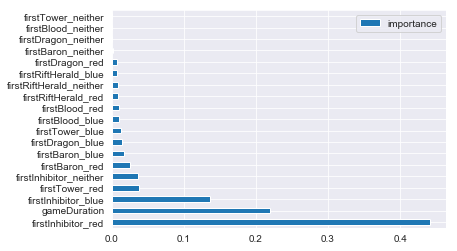

In [48]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances.iloc[0:25].plot.barh()

Finalmente, podemos ver cuánto impactó cada valor en los modelos. Como es de esperar, los valores de los primeros inhibidores tanto para el equipo rojo como para el azul son los más importantes.

# Results and Discussion 

Después de ejecutar los diferentes algoritmos y encontrar una puntuación decente en todos los modelos probados, podría decir que existe una relación alta entre el ganador del juego y los "primeros" objetivos. Con la mayoría de los modelos con una precisión del 65% al 89%, puedo decir que los primeros objetivos pueden decidir un juego, pero hay otras cosas que deben estar en el punto para que sea mejor que no haya contemplado en los modelos. 

Por ejemplo, la composición del equipo también es un aspecto muy importante, y de ninguna manera se analizó en mis modelos. Existe la posibilidad de que, al considerar variables como roles y meta campeones, hubiera podido obtener una mayor precisión en los modelos.

Despues de correr todos los modelos con la misma data, llegue a la conclucion de que para este problema el mejor algoritmo eria Decision Tree con 89% de accuracy.

In [49]:
data = np.array([['','Ridge Regression','AdaBoost',"XGBoost","Random Forrest","Decision Tree", "Embedding Neural Network"],
                ['Accuracy',"63.3%","64.3%","73.4%","43.3%","89.4%","74%"]])
pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])

,Ridge Regression,AdaBoost,XGBoost,Random Forrest,Decision Tree,Embedding Neural Network
Accuracy,63.3%,64.3%,73.4%,43.3%,89.4%,74%


El 89% definitivamente podría mejorarse, pero sería interesante ver si realmente funcionó en La Grieta del Invocador. Es por razones obvias que el Decision Tree tiene el mejor performance de todos. Visto desde una perspectiva del jugador tambien se deberia de basar en una serie de decisiones para poder llegar a cumplir ese objetivo en el nivel temprano. 

Intenté la estrategia yo mismo (la evidencia se puede ver en el primer apéndice), y en general no fue tan mala. Tuve una tasa de ganancias del 60% o 70% en juegos clasificados y normales. La cuestión es que hay ciertos aspectos de los primeros objetivos que son alto riesgo, alta recompensa, y algunos de ellos no dieron resultado. Por ejemplo, elegir el primer dragón demasiado temprano en el juego en algunos casos mataría a mi personaje y, debido a eso, el equipo enemigo podría llevarse el dragón gratis. Además, el juego de la mitad a la tardía debía ser casi perfecto para que un equipo se mantuviera al día con los primeros objetivos. Si comienzas a jugar de forma tonta y dejas de jugar para cumplir con los siguientes objetivos, el juego se puede convertir fácilmente, lo que hace que tu equipo pierda el juego a la larga.

# Conclusions 


1) ¿Comenzar en ambos lados del mapa te da alguna ventaja?    
- Si eres inteligente con eso, sí. Ciertos objetivos como los dragones y el Rift Herald aparecen en ambos lados del mapa pero en direcciones opuestas, por lo que si planeas tomar un dragón temprano y comenzar en el lado azul, tendrás un mejor control del mapa y, por lo tanto, tendrás una ventaja.    

2) ¿Pueden los "primeros" objetivos decidir el resultado de un juego?      
- Sí, pero debes aprovechar esa ventaja a lo largo del juego.      

3) ¿Realmente hace una diferencia?          
- Sí lo hace, lo he probado yo mismo.    (Appendix 1)

4) ¿Pueden los jugadores profesionales planear estrategias para esto?    
- Sí podrían, pero estos equipos tienen una amplia variedad de estrategias con respecto a las tácticas tempranas del juego.


# Appendix 

## 1) My OP.GG profile (https://lan.op.gg/summoner/userName=Shadeslayer4322)
Esto es realmente importante, ya que decidí que solo con los números no era suficiente y decidí probar esta estrategia por mi cuenta. Como puede ver, la tasa de ganancias no es tan mala, pero podría ser mejor. Como se puede ver en los juegos, la mayoría de los objetivos fueron alcanzados por mi equipo, lo que en la mayoría de los casos nos dio el liderazgo. Nuevamente, las composiciones del equipo tienen mucho que decir al respecto, y si alguna vez has jugado League of Legends, podrías ver eso en los registros del juego.

## 2) An Official Board prediction based on early game strategies (https://boards.na.leagueoflegends.com/en/c/gameplay-plus/nO0XWjlm-prediction-predator-might-become-the-next-big-thing-used-in-season-9-and-this-is-problematic)

Aquí puede ver cómo las personas persiven el juego temprano y cómo están mentalmente inclinadas a dominar el juego temprano.
## 3) League of Legends Strategy: Why & How to Start Strong: - Mobalytics (https://mobalytics.gg/blog/start-strong-league-legends/)

Estas son algunas de las primeras estrategias de juego que usan los profesionales, y en algunas de ellas puedes ver un paralelo con la proposición que hago, como ir por los primeros objetivos y mantener el liderazgo. 

## 4) Predicting League of Legends Match Outcome with Embeddings and Deep Learning (https://mc.ai/predicting-league-of-legends-match-outcome-with-embeddings-and-deep-learning/)